In this peroject, you will create a deep learning model that detects the TNt tubes formed in between cells. Below is a berief decsripton of what TNTs are:

"Tunneling nanotubes (TNTs) are elongated structures extending from and connecting cancer cell membranes. They permit the exchange of molecules, vesicles, and mitochondria, as well as genetic and metabolic signals that promote carcinogenesis. Given that they permit intercellular trafficking and communication, TNTs may serve as an important imaging biomarker of cancer cell response vs. resistance to therapy. On fluorescence imaging of cancer cell cultures, TNTs appear to be no thicker than 1 µm and vary in length from 10 to 100+ µm. TNTs can be spotted by a trained eye, but using human experts to obtain an accurate count and location of TNTs is a time-intensive process. A precise quantitative analysis of TNTs could aid in the objective assessment of cancer response to various therapeutic interventions."

In this project, the original images were created by taking a grid of 5 × 5 tiled images, each measuring 1388 × 1040 pixels, and then stitching them together. This process resulted in shadows along the stitched edges, which significantly degraded the model performance at later stages. You may start from removing these shadows. To remove those shadows, you may use BaSiC, an image correction method for background and shading correction for image sequences, available as a Fiji/ImageJ. You may consider other packages/lobraries for this purpose. You may also consider using different filters. You may check the following link: https://www.youtube.com/watch?v=xCHbcVUCYBI. You may find very useful short videos in that channel for image processing.

After preprocessing, you may want to divide the original image into smaller pieces. The original image in the training dataset was stitched together resulting in an image - size of 6283 × 4687 pixels. You can scan the images  with a sliding window of 512 × 512 pixels with a stride of 10 pixels, extracting patches containing the TNT regions using a bounding box. You may write a function that takes the window size as input. You may later create smaller images from 512x512 images using the same function.

Once you form training and test datasets from smaller images, you may simply train a VGG model. You may try different models. you goal is to find the images that contain TNTs. You may create multiple models that are trained with images with different sizes.

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
proj_path = '/content/drive/MyDrive/DL_project/TNT/preprocessed'
os.chdir(proj_path)

In [3]:
ls

m05-label.png  m05.png  patch_creation.ipynb


In [4]:
!pip install patchify

In [5]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=69a46d718af583e6255fe3aea45c0d5893000a2385c94c3b5afeab77971a94f5
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


# Image Preprocessing

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import sys
from patchify import patchify
import glob
from sklearn.model_selection import train_test_split
import glob
import swifter

This is the image with labels

Shape of the Original image without labels: (4690, 6278, 3)


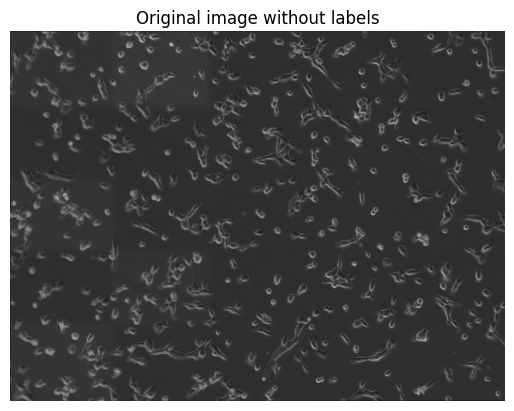

Shape of the Original image with labels: (4690, 6278, 3)


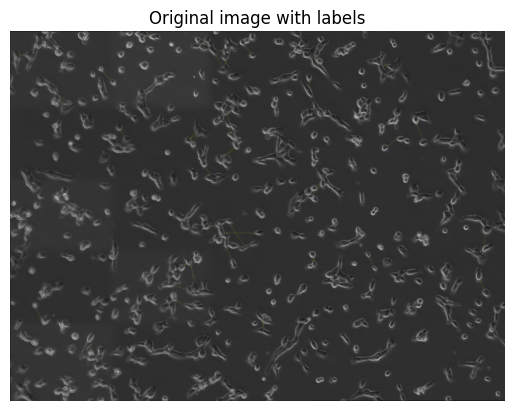

In [7]:
def load_and_display_image(image_name, title):
    """Load an image, convert to RGB and display."""
    # Load the image
    image_path = os.path.join(proj_path, image_name)
    image = cv2.imread(image_path)
    print(f'Shape of the {title}: {image.shape}')

    # Convert BGR to RGB format.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(title)
    plt.show()

    return image

# Load and display image without labels
image = load_and_display_image('m05.png', 'Original image without labels')

# Load and display image with labels
labelled_image = load_and_display_image('m05-label.png', 'Original image with labels')


![Screen Shot 2022-04-30 at 5.32.27 AM.png](attachment:27b423ed-9de7-4634-9288-52f227b53968.png)

This is the same image without labels.



from keras.preprocessing.image import ImageDataGenerator





from keras.preprocessing.image import ImageDataGenerator




from keras.preprocessing.image import ImageDataGenerator
dshhdfjlkshdlksjxma;lfrom keras.preprocessing.image import ImageDataGenerator
kjehdlfrom keras.preprocessing.image import ImageDataGenerator


![Screen Shot 2022-04-30 at 5.33.17 AM.png](attachment:a426a0b5-5596-4037-a92b-24753646b87a.png)

- Create folders to save the images that are created by splitting the main image into smaller pieces


![Screen Shot 2022-04-30 at 5.39.51 AM.png](attachment:323c38bf-351c-4123-a434-622843c08e15.png)

- Create smaller pieces from the main image by moving a window along the image. Mark the pieces with TNTs as 1 and all others as 0. This will give you the labeled images for your classification model.

![Screen Shot 2022-04-30 at 5.25.53 AM.png](attachment:5ffe6c33-f176-418f-b0c2-7de8fdb54ca2.png)

![image.png](attachment:3c0f5fe4-5dce-4309-9d13-6c0ca1456c23.png)

![image.png](attachment:4ed21fdd-484c-47ae-a521-408e48c1d204.png)

![Unknown.png](attachment:fe969990-2e4f-41ad-ba28-eddf83c2b9ed.png)

In [8]:
inp_image = cv2.imread(os.path.join(proj_path, 'm05.png'), cv2.IMREAD_GRAYSCALE) # Load grayscale image

In [9]:
import cv2
import numpy as np

# Define a 5x5 rectangular structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

# Dilate the edges with the custom kernel
dilated = cv2.dilate(inp_image, kernel, iterations=2)

# Apply Canny Edge Detection
edges = cv2.Canny(dilated, 15, 45)

# Save the result
cv2.imwrite(os.path.join(proj_path, 'final_preprocessed.png'), edges)

True

In [10]:
preprocessed_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

In [11]:
# Specify the paths for the directories where patches have to be created.
patch_dir_no_lbl = os.path.join(proj_path, 'patch_no_label')
patch_dir_lbl = os.path.join(proj_path, 'patch_label')

# Create the directories if they don't exist
os.makedirs(patch_dir_no_lbl, exist_ok=True)
os.makedirs(patch_dir_lbl, exist_ok=True)

In [15]:
# Generate patches from the original image using patchify
def patch_generator(image, patch_dim, step):

    if patch_dim[0] > image.shape[0] or patch_dim[1] > image.shape[1]:
        raise ValueError('Patch dimensions should be smaller than image dimensions')

    # Create the patches of configured dimension.
    patches = patchify(image, patch_dim, step)

    # shape of the numpy array returned  by patchify: (n_rows, n_cols, 1, H, W, N)
    # H - height of the patch
    # W - width of the patch
    # N - number of channels

    print(f'Patch shape: {patches.shape}')
    num_patches = patches.shape[0] * patches.shape[1]
    print(f'Number of patches: {num_patches}')

    num_dimensions = image.ndim
    print(f'Number of dimensions: {num_dimensions}')
    for i in range(num_patches):
        row_idx = i // patches.shape[1]
        col_idx = i % patches.shape[1]

        if num_dimensions > 2:
            patch = patches[row_idx, col_idx, 0] #row index, col_index, 1
        else:
            patch = patches[row_idx, col_idx]
        #print(patch.shape)
        yield row_idx, col_idx, patch

In [16]:
def save_patches(patch_generator, output_dir):
    """Process and save patches from the provided generator to the specified directory"""
    for row_idx, col_idx, patch in patch_generator:
        # Save each patch in a file for training
        image_name = f'patch_row_{row_idx}_col_{col_idx}.png'
        output_path = os.path.join(output_dir, image_name)
        if not os.path.exists(output_path):
            if not cv2.imwrite(output_path, patch):
                raise Exception(f'Could not write image to {output_path}')


In [17]:
preprocessed_img.shape

(4690, 6278, 3)

In [18]:
# Patch dimension: (height, width, channels)
patch_dim = (512, 512, 3)

# Step is the stride length in pixels
step = 50

# Create a generator for patches without labels and save patches
patch_generator_no_lbl = patch_generator(preprocessed_img, (512, 512, 3), step)
save_patches(patch_generator_no_lbl, patch_dir_no_lbl)

print('Done with patch creation for non-labelled image')
# Create a generator for patches with labels and save patches
patch_generator_lbl = patch_generator(labelled_image, patch_dim, step)
save_patches(patch_generator_lbl, patch_dir_lbl)

print('Done with patch creation for labelled image')

Patch shape: (84, 116, 1, 512, 512, 3)
Number of patches: 9744
Number of dimensions: 3
Done with patch creation for non-labelled image
Patch shape: (84, 116, 1, 512, 512, 3)
Number of patches: 9744
Number of dimensions: 3
Done with patch creation for labelled image


In [19]:
# Dir path where all the patches are present with no labels.
patch_dir = os.path.join(proj_path, 'patch_no_label')
patch_images_path = glob.glob(os.path.join(patch_dir, '*.png'))

In [20]:
# Create a dataframe with image file paths
df = pd.DataFrame({'image_path': patch_images_path})
df.head()

,image_path
0,/content/drive/MyDrive/DL_project/TNT/preproce...
1,/content/drive/MyDrive/DL_project/TNT/preproce...
2,/content/drive/MyDrive/DL_project/TNT/preproce...
3,/content/drive/MyDrive/DL_project/TNT/preproce...
4,/content/drive/MyDrive/DL_project/TNT/preproce...


In [21]:
def count_yellow_pixels(inp_image_path):
    labelled_img_path = inp_image_path.replace('patch_no_label', 'patch_label')
    labelled_img = cv2.imread(labelled_img_path)

    # If labelled_img is not read properly, then throw an error.
    if labelled_img is None:
        raise FileNotFoundError(f"Could not load image at {labelled_img_path}")

    # Converting BGR to HSV format
    hsv = cv2.cvtColor(labelled_img,cv2.COLOR_BGR2HSV)

    # Range for lower and upper range of yellow colored pixels
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])

    mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)

    # Calculate the number of yellow pixels
    yellow_pixels = cv2.countNonZero(mask_yellow)

    return yellow_pixels

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
def has_TNT(inp_image_path, threshold=50):
    # If the number of yellow pixels is greater than the threshold, then mark the presence of TNT.
    if count_yellow_pixels(inp_image_path) >= threshold:
        return True
    else:
        return False

In [24]:
df['label'] = df['image_path'].swifter.apply(lambda x: 'TNT' if has_TNT(x) else 'No TNT')

Pandas Apply:   0%|          | 0/9744 [00:00<?, ?it/s]

In [25]:
df.head()

,image_path,label
0,/content/drive/MyDrive/DL_project/TNT/preproce...,TNT
1,/content/drive/MyDrive/DL_project/TNT/preproce...,TNT
2,/content/drive/MyDrive/DL_project/TNT/preproce...,TNT
3,/content/drive/MyDrive/DL_project/TNT/preproce...,No TNT
4,/content/drive/MyDrive/DL_project/TNT/preproce...,No TNT


In [26]:
# Configure paths
train_df_path = os.path.join(proj_path, 'train_df.csv')
val_df_path = os.path.join(proj_path, 'val_df.csv')
test_df_path = os.path.join(proj_path, 'test_df.csv')

In [27]:
print(f'Configured train data path : {train_df_path}')
print(f'Configured validation data path : {val_df_path}')
print(f'Configured test data path : {test_df_path}')

Configured train data path : /content/drive/MyDrive/DL_project/TNT/preprocessed/train_df.csv
Configured validation data path : /content/drive/MyDrive/DL_project/TNT/preprocessed/val_df.csv
Configured test data path : /content/drive/MyDrive/DL_project/TNT/preprocessed/test_df.csv


In [28]:
# 80% data for training, 10% data for validation and 10% data for test.
train_df, rem_df = train_test_split(df, test_size=0.2, stratify=df['label'],
                                    random_state=100, shuffle=True)

In [29]:
# 10% data for validation and 10% data for test.
val_df, test_df = train_test_split(rem_df, test_size=0.5, stratify=rem_df['label'],
                                   random_state=100, shuffle=True)

In [30]:
train_df['label'].value_counts()

No TNT    5311
TNT       2484
Name: label, dtype: int64

In [31]:
val_df['label'].value_counts()

No TNT    664
TNT       310
Name: label, dtype: int64

In [32]:
test_df['label'].value_counts()

No TNT    664
TNT       311
Name: label, dtype: int64

In [33]:
# Write to CSV files
train_df.to_csv(train_df_path, index=False)
val_df.to_csv(val_df_path, index=False)
test_df.to_csv(test_df_path, index=False)

In [34]:
# Read CSV file into a DataFrame
train_df = pd.read_csv('train_df.csv')
val_df = pd.read_csv('val_df.csv')
test_df = pd.read_csv('test_df.csv')

In [35]:
train_df['label'].value_counts()

No TNT    5311
TNT       2484
Name: label, dtype: int64

In [36]:
val_df['label'].value_counts()

No TNT    664
TNT       310
Name: label, dtype: int64

In [37]:
test_df['label'].value_counts()

No TNT    664
TNT       311
Name: label, dtype: int64